In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
merge_data_dropna = pd.read_csv('')/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/merge_data_dropna.csv

In [3]:
drop_cols = ['order_id', 'customer_unique_id', 'product_id', 'review_id', 'order_item_id', 'purchase_cnt']

merge_data_dropna = merge_data_dropna.drop(drop_cols, axis=1)

In [4]:
merge_data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    110750 non-null  object 
 1   price                          110750 non-null  float64
 2   freight_value                  110750 non-null  float64
 3   review_score                   110750 non-null  float64
 4   product_photos_qty             110750 non-null  float64
 5   product_description_lenght     110750 non-null  float64
 6   product_name_lenght            110750 non-null  float64
 7   product_category_name_english  110750 non-null  object 
 8   repurchase                     110750 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 7.6+ MB


In [ ]:
merge_data_dropna['product_category_name_english'].unique()

In [ ]:

df1 = pd.read_csv("/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/merge_data_dropna.csv")

# customer_id + 필요한 컬럼만 선택
df2 = pd.read_csv("C://Users/nsjic/Downloads/olist_customers_dataset.csv")[["customer_id", "customer_state"]]

# customer_id 기준으로 병합
df = pd.merge(df1, df2, on="customer_id", how="left")

# 결과 저장
df.to_csv("/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/merge_data_fin.csv", index=False)


## 로지스틱 회귀

In [6]:
merge_data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    110750 non-null  object 
 1   price                          110750 non-null  float64
 2   freight_value                  110750 non-null  float64
 3   review_score                   110750 non-null  float64
 4   product_photos_qty             110750 non-null  float64
 5   product_description_lenght     110750 non-null  float64
 6   product_name_lenght            110750 non-null  float64
 7   product_category_name_english  110750 non-null  object 
 8   repurchase                     110750 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 7.6+ MB


In [42]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 독립변수(X), 종속변수(y) 지정
# target이 종속변수라 가정
X = data_final.select_dtypes(include=['number']).drop("repurchase", axis=1)
y = data_final["repurchase"]

# 1. 훈련셋 / 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. 모델 정의 및 학습
model = LogisticRegression(max_iter=1000)  # 반복 횟수는 데이터에 맞춰 충분히 늘려줌
model.fit(X_train, y_train)

# 3. 예측
y_pred = model.predict(X_test)

# 4. 평가
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))

정확도 (Accuracy): 0.8309706546275395

혼동 행렬 (Confusion Matrix):
 [[18406     0]
 [ 3744     0]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     18406
           1       0.00      0.00      0.00      3744

    accuracy                           0.83     22150
   macro avg       0.42      0.50      0.45     22150
weighted avg       0.69      0.83      0.75     22150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [10]:
# !pip install catboost

from catboost import CatBoostClassifier



# 1. 데이터 불러오기
X = merge_data_dropna.drop(['customer_id', "repurchase"], axis=1)
y = merge_data_dropna["repurchase"]

# 2. 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(cat_features=['product_category_name_english', 'product_top_category'], verbose=0)
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

# 6. 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

# 평가
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))

ValueError: 'product_top_category' is not in list

## 컬럼 추가

In [ ]:
merge_data_dropna['product_category_name_english'].unique()

## `product_catgory_name`의 상위 카테고리 컬럼 추가 -> `product_top_cateory`

### 🏠 생활/가정 (Home & Living)

housewares

furniture_decor, furniture_bedroom, furniture_living_room, furniture_mattress_and_upholstery, office_furniture

bed_bath_table

kitchen_dining_laundry_garden_furniture

home_appliances, home_appliances_2

small_appliances, small_appliances_home_oven_and_coffee

home_confort, home_comfort_2

home_construction

garden_tools, costruction_tools_garden

construction_tools_construction, construction_tools_lights, construction_tools_safety, costrucion_tools_tools

air_conditioning

기준: 주거 공간, 가구, 주방/욕실, 생활 편의용품, 건축 및 수리 관련 용품.

### 💄 패션/뷰티 (Fashion & Beauty)

fashion_male_clothing, fashio_female_clothing, fashion_childrens_clothes

fashion_shoes

fashion_underwear_beach

fashion_bags_accessories

fashion_sport

watches_gifts

health_beauty

perfumery

기준: 의류, 신발, 가방, 액세서리, 뷰티 및 향수.

### 🧸 취미/엔터테인먼트 (Entertainment & Leisure)

toys

cool_stuff

sports_leisure

consoles_games

cine_photo

music, cds_dvds_musicals, dvds_blu_ray

art, arts_and_craftmanship

musical_instruments

books_general_interest, books_technical, books_imported

party_supplies, christmas_supplies

기준: 취미, 여가 활동, 문화·예술·스포츠 용품.

### 💻 전자/디지털 (Electronics & Digital)

computers, computers_accessories

tablets_printing_image

electronics

audio

telephony, fixed_telephony

signaling_and_security, security_and_services

기준: 전자제품, 디지털 기기, 음향·영상 기기, 보안 장치.

### 👶 유아/아동 (Baby & Kids)

baby

diapers_and_hygiene

fashion_childrens_clothes

기준: 유아 및 아동 의류, 위생, 육아용품.

### 🍎 식품/주류 (Food & Beverages)

food, food_drink

drinks

agro_industry_and_commerce

la_cuisine

flowers

기준: 일반 식품, 음료, 농축산물, 원예/꽃.

### 📚 문구/사무 (Stationery & Office)

stationery

office_furniture

industry_commerce_and_business

market_place

기준: 문구류, 사무용 가구, B2B/상업 관련 제품.

In [ ]:
category_mapping = {
    # 🏠 생활/가정
    "housewares": "Home & Living",
    "furniture_decor": "Home & Living",
    "furniture_bedroom": "Home & Living",
    "furniture_living_room": "Home & Living",
    "furniture_mattress_and_upholstery": "Home & Living",
    "office_furniture": "Home & Living",
    "bed_bath_table": "Home & Living",
    "kitchen_dining_laundry_garden_furniture": "Home & Living",
    "home_appliances": "Home & Living",
    "home_appliances_2": "Home & Living",
    "small_appliances": "Home & Living",
    "small_appliances_home_oven_and_coffee": "Home & Living",
    "home_confort": "Home & Living",
    "home_comfort_2": "Home & Living",
    "home_construction": "Home & Living",
    "garden_tools": "Home & Living",
    "costruction_tools_garden": "Home & Living",
    "construction_tools_construction": "Home & Living",
    "construction_tools_lights": "Home & Living",
    "construction_tools_safety": "Home & Living",
    "costruction_tools_tools": "Home & Living",
    "air_conditioning": "Home & Living",

    # 💄 패션/뷰티
    "fashion_male_clothing": "Fashion & Beauty",
    "fashio_female_clothing": "Fashion & Beauty",
    "fashion_childrens_clothes": "Fashion & Beauty",
    "fashion_shoes": "Fashion & Beauty",
    "fashion_underwear_beach": "Fashion & Beauty",
    "fashion_bags_accessories": "Fashion & Beauty",
    "fashion_sport": "Fashion & Beauty",
    "watches_gifts": "Fashion & Beauty",
    "health_beauty": "Fashion & Beauty",
    "perfumery": "Fashion & Beauty",
    "luggage_accessories": "Fashion & Beauty",

    # 🧸 취미/엔터테인먼트
    "toys": "Entertainment & Leisure",
    "cool_stuff": "Entertainment & Leisure",
    "sports_leisure": "Entertainment & Leisure",
    "consoles_games": "Entertainment & Leisure",
    "cine_photo": "Entertainment & Leisure",
    "music": "Entertainment & Leisure",
    "cds_dvds_musicals": "Entertainment & Leisure",
    "dvds_blu_ray": "Entertainment & Leisure",
    "art": "Entertainment & Leisure",
    "arts_and_craftmanship": "Entertainment & Leisure",
    "musical_instruments": "Entertainment & Leisure",
    "books_general_interest": "Entertainment & Leisure",
    "books_technical": "Entertainment & Leisure",
    "books_imported": "Entertainment & Leisure",
    "party_supplies": "Entertainment & Leisure",
    "christmas_supplies": "Entertainment & Leisure",

    # 💻 전자/디지털
    "computers": "Electronics & Digital",
    "computers_accessories": "Electronics & Digital",
    "tablets_printing_image": "Electronics & Digital",
    "electronics": "Electronics & Digital",
    "audio": "Electronics & Digital",
    "telephony": "Electronics & Digital",
    "fixed_telephony": "Electronics & Digital",
    "signaling_and_security": "Electronics & Digital",
    "security_and_services": "Electronics & Digital",

    # 👶 유아/아동
    "baby": "Baby & Kids",
    "diapers_and_hygiene": "Baby & Kids",

    # 🍎 식품/주류
    "food": "Food & Beverages",
    "food_drink": "Food & Beverages",
    "drinks": "Food & Beverages",
    "agro_industry_and_commerce": "Food & Beverages",
    "la_cuisine": "Food & Beverages",
    "flowers": "Food & Beverages",

    # 📚 문구/사무
    "stationery": "Stationery & Office",
    "industry_commerce_and_business": "Stationery & Office",
    "market_place": "Stationery & Office",

    # other
    "pet_shop": "pet",
    'auto': 'auto',
    'market_place': 'market_place'
}

In [ ]:
# 매핑 적용
merge_data_dropna["product_top_category"] = merge_data_dropna["product_category_name_english"].map(category_mapping).fillna("Other")

print(merge_data_dropna)

In [40]:
data_final["product_top_category"].unique()

array(['Home & Living', 'Fashion & Beauty', 'auto', 'pet',
       'Stationery & Office', 'Electronics & Digital',
       'Entertainment & Leisure', 'Baby & Kids', 'Food & Beverages',
       'market_place'], dtype=object)

In [ ]:

df1 = pd.read_csv("/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/product_top_category.csv")

# customer_id + 필요한 컬럼만 선택
df2 = pd.read_csv("/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/olist_customers_dataset.csv")[["customer_id", "customer_state"]]

# customer_id 기준으로 병합
df = pd.merge(df1, df2, on="customer_id", how="left")

# 결과 저장
df.to_csv("/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/data/merge_data_fin.csv", index=False)


## CatBoost

In [49]:
# !pip install catboost

from catboost import CatBoostClassifier



# 1. 데이터 불러오기
X = data_final.drop(['customer_id', "repurchase"], axis=1)
y = data_final["repurchase"]

# 2. 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(cat_features=['product_category_name_english', 'product_top_category', 'customer_state'], verbose=0)
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]


# 6. 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

# 평가
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))

Accuracy: 0.856117381489842
정확도 (Accuracy): 0.856117381489842

혼동 행렬 (Confusion Matrix):
 [[18155   277]
 [ 2910   808]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     18432
           1       0.74      0.22      0.34      3718

    accuracy                           0.86     22150
   macro avg       0.80      0.60      0.63     22150
weighted avg       0.84      0.86      0.82     22150



In [15]:
X_test['repurchase_prob'] = y_prob

In [16]:
X_test.head(10)

,price,freight_value,review_score,product_photos_qty,product_description_lenght,product_name_lenght,product_category_name_english,product_top_category,customer_state,repurchase_prob
4009,44.99,7.78,4.0,2.0,537.0,58.0,cool_stuff,Entertainment & Leisure,SP,0.058618
87841,109.00,16.20,5.0,2.0,1096.0,38.0,toys,Entertainment & Leisure,SP,0.043718
28110,44.90,22.93,5.0,3.0,752.0,52.0,toys,Entertainment & Leisure,RS,0.068314
15996,98.90,7.95,5.0,2.0,953.0,45.0,perfumery,Fashion & Beauty,SP,0.076232
85003,167.00,18.78,3.0,4.0,409.0,48.0,furniture_decor,Home & Living,RJ,0.116694
93985,330.00,43.84,4.0,6.0,2644.0,60.0,health_beauty,Fashion & Beauty,RN,0.017098
55362,49.90,13.37,5.0,2.0,340.0,58.0,garden_tools,Home & Living,SP,0.328666
110237,30.90,10.53,4.0,10.0,1052.0,53.0,garden_tools,Home & Living,SP,0.184123
41333,99.90,14.87,5.0,1.0,544.0,42.0,perfumery,Fashion & Beauty,SP,0.086022
105378,59.90,17.99,5.0,1.0,254.0,59.0,sports_leisure,Entertainment & Leisure,RJ,0.135274


In [17]:
X_test['state_category_mean_prob'] = X_test.groupby(['customer_state', 'product_top_category'])['repurchase_prob'].transform('mean')

In [26]:
state_repurchase_top_categ = X_test.sort_values(["customer_state", "repurchase_prob"], ascending=False).drop_duplicates("customer_state")

In [30]:
state_repurchase_top_categ[['customer_state','product_top_category','state_category_mean_prob']]

,customer_state,product_top_category,state_category_mean_prob
74949,TO,Home & Living,0.199819
40775,SP,Fashion & Beauty,0.108650
88709,SE,Home & Living,0.257634
18550,SC,Home & Living,0.279840
2235,RS,Fashion & Beauty,0.105124
60352,RR,Entertainment & Leisure,0.484161
87835,RO,Home & Living,0.133718
47755,RN,pet,0.571143
7718,RJ,Home & Living,0.243726
6804,PR,auto,0.138280


## 지도 시각화

In [33]:
import json
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"

# GeoJSON 로드
with open(r"/content/drive/MyDrive/EPOCH/EPOCH 4th/MiniProject/brazil_geo.json", "r", encoding="utf-8") as f:
    br_states = json.load(f)

# 브라질 주 약어 → 풀네임 맵핑
state_map = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AM": "Amazonas",
    "AP": "Amapá",
    "BA": "Bahia",
    "CE": "Ceará",
    "DF": "Distrito Federal",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "MA": "Maranhão",
    "MT": "Mato Grosso",
    "MS": "Mato Grosso do Sul",
    "MG": "Minas Gerais",
    "PA": "Pará",
    "PB": "Paraíba",
    "PR": "Paraná",
    "PE": "Pernambuco",
    "PI": "Piauí",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RS": "Rio Grande do Sul",
    "RO": "Rondônia",
    "RR": "Roraima",
    "SC": "Santa Catarina",
    "SP": "São Paulo",
    "SE": "Sergipe",
    "TO": "Tocantins"
}

# top1에 state_name 컬럼 추가
state_repurchase_top_categ["state_name"] = state_repurchase_top_categ["customer_state"].map(state_map)

# Choropleth 그리기 (GeoJSON의 'properties.name'과 매칭)
fig = px.choropleth(
    state_repurchase_top_categ,
    geojson=br_states,
    locations="state_name",
    featureidkey="properties.name",
    color="product_top_category",
    hover_data=["state_category_mean_prob"],
    title="Top1 Repurchase Category per State (Brazil)",
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### CatBoost 모델 성능 시각화

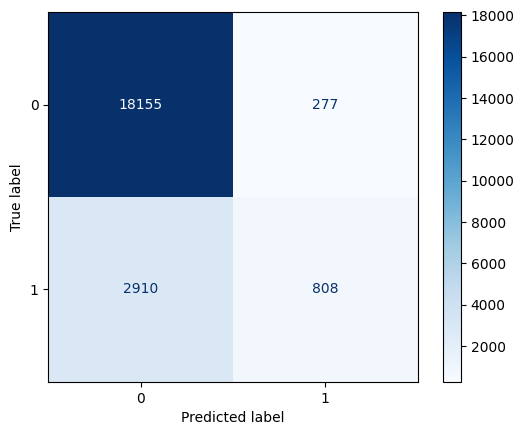

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

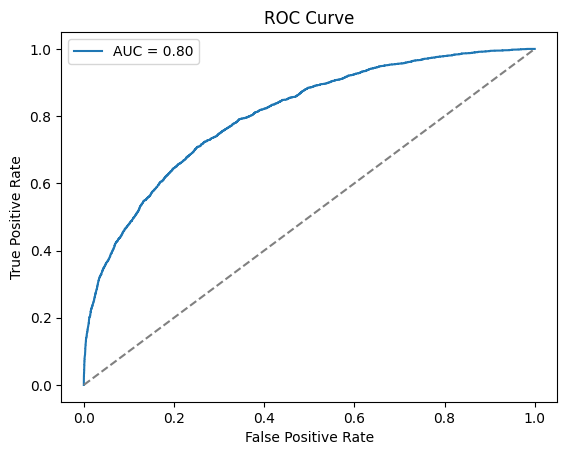

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

###

In [36]:
from catboost import CatBoostClassifier, Pool

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
# 모델 학습
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)

# 중요도 계산
importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))
for col, val in zip(X_train.columns, importances):
    print(f"{col}: {val}")

price: 20.771147241934028
freight_value: 3.2629571957607837
review_score: 6.620620346059461
product_photos_qty: 8.538028341678983
product_description_lenght: 9.955683215578162
product_name_lenght: 4.997363346038964
product_category_name_english: 17.639077745127224
product_top_category: 27.46032501650295
customer_state: 0.7547975513194574


# LightGBM + SMOTENC

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_recall_curve, f1_score
)

from imblearn.over_sampling import SMOTENC
from lightgbm import LGBMClassifier


data_final = pd.read_csv("C://Users/nsjic/Downloads/merge_data_fin.csv")

# 데이터 분리
X = data_final.drop(['customer_id', 'repurchase'], axis=1).copy()
y = data_final['repurchase'].astype(int).copy()

# 범주형/결측 처리
cat_cols = ['product_category_name_english', 'product_top_category', 'customer_state']
for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype('object').fillna('missing')

# 학습/평가 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ordinal 인코딩 (SMOTENC는 정수 인코딩 필요)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

X_train_enc[cat_cols] = enc.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols]  = enc.transform(X_test_enc[cat_cols])

# SMOTENC (train에만 적용)
cat_idx = [X_train_enc.columns.get_loc(c) for c in cat_cols]

smote = SMOTENC(
    categorical_features=cat_idx,
    random_state=42,
    k_neighbors=5   # 데이터 상황 따라 조절 가능
)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)

# LightGBM 학습
lgbm = LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.9,
)
lgbm.fit(X_train_bal, y_train_bal)

# 확률 예측 & 임계값 최적화(F1 최대화)
y_prob = lgbm.predict_proba(X_test_enc)[:, 1]

prec, rec, ths = precision_recall_curve(y_test, y_prob)

# precision_recall_curve가 반환하는 ths는 마지막 점 하나가 부족하므로 길이 맞춰 F1 계산
f1s = []
for p, r in zip(prec[:-1], rec[:-1]):
    if (p + r) == 0:
        f1s.append(0)
    else:
        f1s.append(2 * p * r / (p + r))

best_idx = int(np.argmax(f1s))
best_threshold = ths[best_idx]
best_f1 = f1s[best_idx]

# 최적 임계값으로 이진화 및 평가
y_pred_opt = (y_prob >= best_threshold).astype(int)

print(f"[최적 임계값 기반 F1 최적화]")
print(f"- Best Threshold: {best_threshold:.4f}")
print(f"- Best F1 (from PR curve): {best_f1:.4f}\n")

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred_opt))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred_opt))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred_opt, digits=4))


## confusion matrix 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 최적 임계값 confusion matrix
cm_opt = confusion_matrix(y_test, y_pred_opt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_opt, display_labels=lgbm.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Optimal Threshold)")
plt.show()

# 0.5 임계값 confusion matrix
cm_05 = confusion_matrix(y_test, y_pred_05)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_05, display_labels=lgbm.classes_)
disp2.plot(cmap="Oranges", values_format="d")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()
